In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("training_data_cleaned.csv")
# === Step 2: Select feature columns (numerical ones only) ===
# Example: assuming the last 16 columns are numerical features
feature_cols = df.columns[-16:]
X = df[feature_cols].values

# === Step 3: Normalize the data ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Step 4: Determine optimal number of clusters (k) ===
wcss = []  # Within-cluster sum of squares
sil_scores = []

In [46]:
K = range(2, 10)  # test k = 2 to 9
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

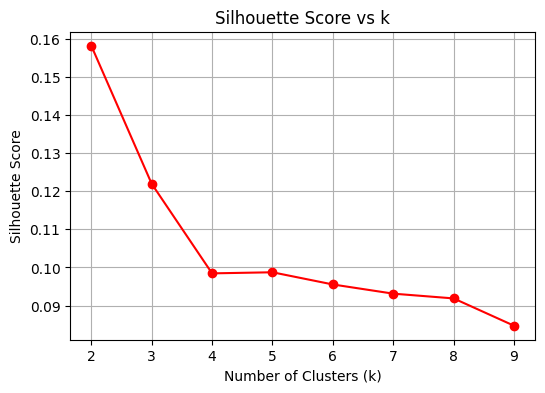

In [48]:
# === Step 6: Plot Silhouette scores ===
plt.figure(figsize=(6, 4))
plt.plot(K, sil_scores, 'ro-', markersize=6)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.grid(True)
plt.show()


In [5]:
best_k = 5  # <-- adjust this after checking the plots
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = final_kmeans.fit_predict(X_scaled)

# === Step 8: Save clustered dataset ===
df.to_csv("clustered_games.csv", index=False)
print(f"✅ Clustering completed with k = {best_k}")
print(df['Cluster'].value_counts())

✅ Clustering completed with k = 5
Cluster
1    81
2    63
4    51
3    46
0    34
Name: count, dtype: int64


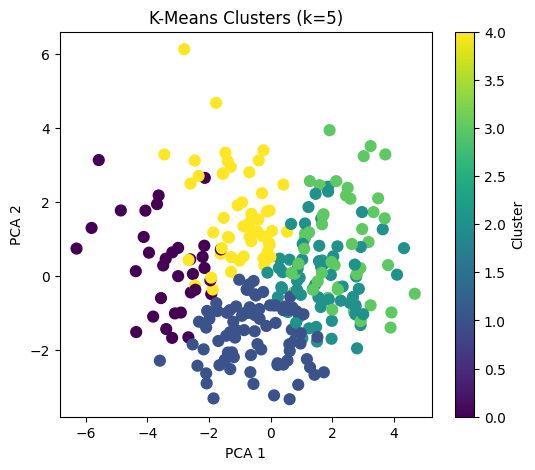

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='viridis', s=60)
plt.title(f"K-Means Clusters (k={best_k})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

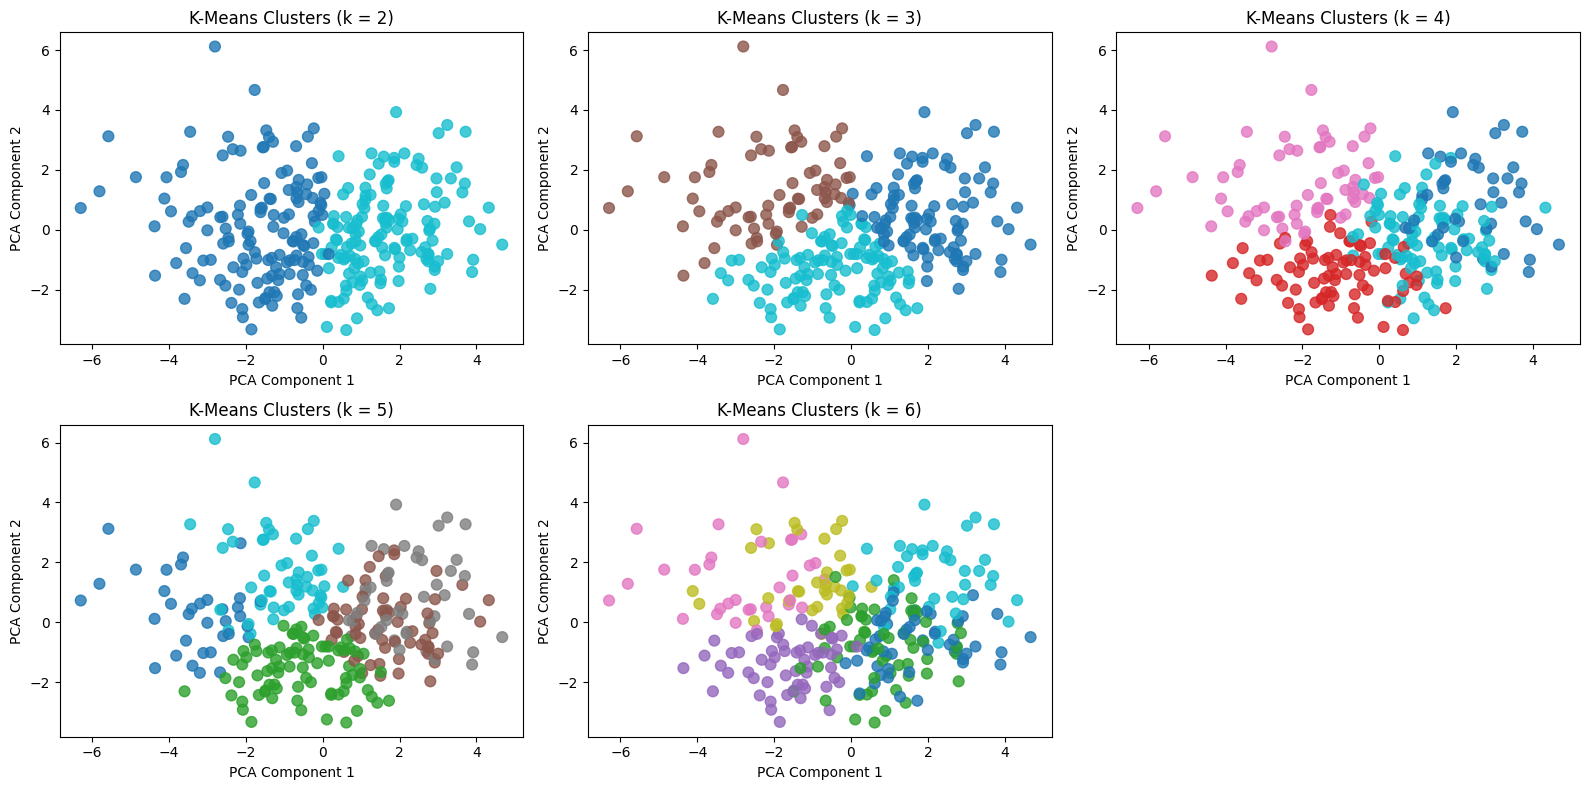

✅ PCA cluster plots generated for k = [2, 3, 4, 5, 6]


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# === Step 1: Load and prepare data ===
df = pd.read_csv("training_data_cleaned.csv")  # replace with your dataset
feature_cols = df.columns[-16:]        # assuming last 16 are numerical features
X = df[feature_cols].values

# === Step 2: Normalize the data ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Step 3: Apply PCA to reduce to 2D (for visualization only) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === Step 4: Define range of k values to explore ===
K = range(2, 7)  # you can change range as needed

# === Step 5: Plot clusters for each k ===
plt.figure(figsize=(16, 8))

for idx, k in enumerate(K, start=1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    plt.subplot(2, 3, idx)  # 2 rows, 3 columns of subplots
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=60, alpha=0.8)
    plt.title(f"K-Means Clusters (k = {k})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

print("✅ PCA cluster plots generated for k =", list(K))

In [9]:
from sklearn.preprocessing import StandardScaler

features = df.select_dtypes(include=['number']).values  # all numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [10]:
from sklearn.mixture import GaussianMixture

k = 5  # optimal number of clusters
gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

# Get the predicted cluster for each game
labels = gmm.predict(X_scaled)
probs = gmm.predict_proba(X_scaled)

for i in range(gmm.n_components):
    df[f'Cluster_{i}_prob'] = probs[:, i]
# Add to DataFrame
df['Cluster'] = labels


In [11]:
print("AIC:", gmm.aic(X_scaled))
print("BIC:", gmm.bic(X_scaled))

AIC: 10270.36156680698
BIC: 13033.57468542424


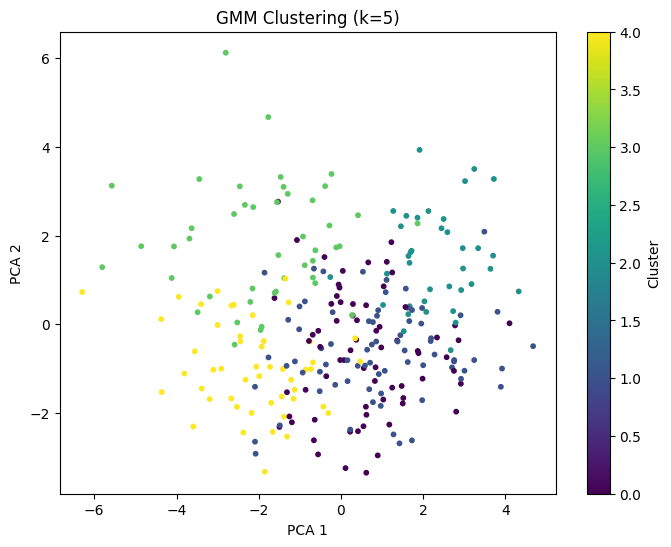

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=10)
plt.title('GMM Clustering (k=5)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [16]:
df.to_csv("clustered_games.csv", index=False)
print(df.head(10)[['Cluster_0_prob','Cluster_1_prob','Cluster_2_prob','Cluster_3_prob','Cluster_4_prob','Cluster']])

   Cluster_0_prob  Cluster_1_prob  Cluster_2_prob  Cluster_3_prob  \
0    9.888716e-01    1.340282e-03    4.729340e-17    8.464825e-06   
1    9.631229e-05    1.542974e-07    5.067643e-13    9.999035e-01   
2    4.215133e-14    2.421750e-07    9.999998e-01    1.137875e-17   
3    9.992283e-01    4.112253e-32    3.272943e-08    4.837334e-04   
4    9.275907e-01    1.055123e-06    1.016741e-11    1.666253e-03   
5    2.272928e-04    9.990198e-01    5.150140e-08    7.526311e-04   
6    6.203984e-13    2.626562e-25    2.333003e-56    9.465859e-05   
7    3.217479e-10    4.826091e-09    1.000000e+00    4.054895e-32   
8    6.768542e-05    2.085600e-01    2.040201e-24    4.979577e-08   
9    5.026066e-04    1.232860e-28    1.151374e-05    9.984838e-01   

   Cluster_4_prob  Cluster  
0    9.779624e-03        0  
1    9.423043e-11        3  
2    1.066607e-15        2  
3    2.879154e-04        0  
4    7.074196e-02        0  
5    1.778814e-07        1  
6    9.999053e-01        4  
7    1.4

In [17]:
import joblib

# Suppose your objects are named 'scaler' and 'gmm_model'
joblib.dump(scaler, "scaler.pkl")
joblib.dump(gmm, "gmm_model.pkl")

print("✅ Scaler and model saved successfully!")

✅ Scaler and model saved successfully!


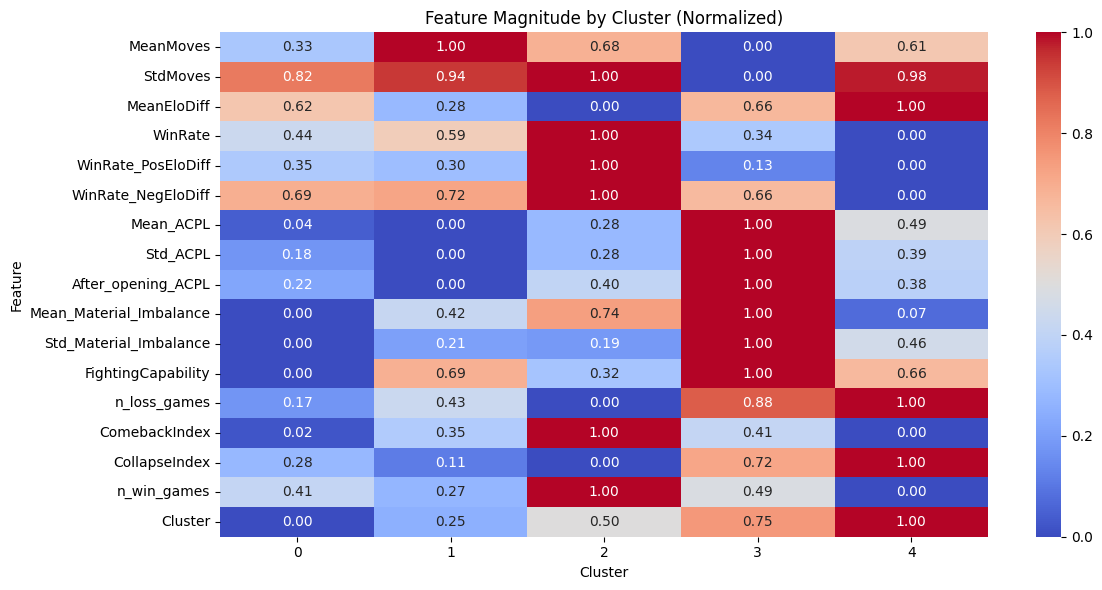

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns (excluding probabilities, if added)
feature_cols = [col for col in df.select_dtypes(include='number').columns 
                if not col.startswith('Cluster_') or col == 'Cluster']

# Group by cluster and compute mean feature values
cluster_means = df.groupby('Cluster')[feature_cols].mean()

# Normalize each feature across clusters for better visualization (optional)
cluster_means_norm = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means_norm.T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature Magnitude by Cluster (Normalized)")
plt.xlabel("Cluster")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()

In [20]:
# Display as table
print(cluster_means_norm.round(2))

# OR save it to CSV
cluster_means_norm.round(3).to_csv("cluster_summary.csv")


         MeanMoves  StdMoves  MeanEloDiff  WinRate  WinRate_PosEloDiff  \
Cluster                                                                  
0             0.33      0.82         0.62     0.44                0.35   
1             1.00      0.94         0.28     0.59                0.30   
2             0.68      1.00         0.00     1.00                1.00   
3             0.00      0.00         0.66     0.34                0.13   
4             0.61      0.98         1.00     0.00                0.00   

         WinRate_NegEloDiff  Mean_ACPL  Std_ACPL  After_opening_ACPL  \
Cluster                                                                
0                      0.69       0.04      0.18                0.22   
1                      0.72       0.00      0.00                0.00   
2                      1.00       0.28      0.28                0.40   
3                      0.66       1.00      1.00                1.00   
4                      0.00       0.49      0.39 

In [41]:
import pandas as pd
import numpy as np

# --- Step 1: Read the CSV file ---
df = pd.read_csv("training_data_cleaned.csv")

# --- Step 2: Choose number of random rows ---
n = 10  # example: pick 10 random rows
sampled_rows = df.sample(n=n, random_state=42).copy()

# --- Step 3: Select the 16 numerical columns ---
# (If they are the last 16 columns as you mentioned earlier)
num_cols = df.columns[-16:]

# --- Step 4: Randomly modify each numeric value (add random 0 to 0.4) ---
sampled_rows[num_cols] = sampled_rows[num_cols] + np.random.uniform(0, 0.6, sampled_rows[num_cols].shape)

# --- Step 5: Save to new CSV file ---
sampled_rows.to_csv("new_players.csv", index=False)


In [42]:
import pandas as pd
import joblib

# === Step 1: Load saved model and scaler ===
scaler = joblib.load("scaler.pkl")        # Must match the one used during training
gmm_model = joblib.load("gmm_model.pkl")  # Or kmeans_model.pkl if using KMeans

# === Step 2: Load multiple players' data ===
players_df = pd.read_csv("new_players.csv")   # Contains 10 rows with same 16 numerical features

# === Step 3: Preprocess (apply same scaling) ===
X_new = scaler.transform(players_df)

# === Step 4: Predict clusters for all players ===
cluster_labels = gmm_model.predict(X_new)

# === Step 5: (Optional) Get cluster probabilities if GMM is used ===
if hasattr(gmm_model, "predict_proba"):
    probs = gmm_model.predict_proba(X_new)
    confidences = [probs[i][cluster_labels[i]] for i in range(len(cluster_labels))]
else:
    confidences = [None] * len(cluster_labels)

# === Step 6: Define cluster personality mapping ===
cluster_personality = {
    0: {
        "label": "Solid Technicians / Quiet Positional",
        "summary": "Accurate, low-tactical players who avoid complications and lose rarely."
    },
    1: {
        "label": "Enduring Strategists / Solid Fighters",
        "summary": "Long, technically sound games; persistent fighters who win by steady play."
    },
    2: {
        "label": "Highly Successful Imbalancers / Dominant Players",
        "summary": "Consistently winning players who create and convert imbalances; very effective across contexts."
    },
    3: {
        "label": "Short-Game Brawlers / All-or-Nothing Tacticians",
        "summary": "Fast, aggressive games with many inaccuracies — high-risk players who often collapse."
    },
    4: {
        "label": "Overextended Fighters / Unsuccessful Grinders",
        "summary": "Long, combative games with frequent overextension and collapses; ambitious but poor outcomes."
    }
}

# === Step 7: Prepare final results ===
results = []
for i in range(len(players_df)):
    cluster = cluster_labels[i]
    personality = cluster_personality.get(cluster, {"label": "Unknown", "summary": "No summary available."})
    results.append({
        "Player_ID": i + 1,
        "Cluster": cluster,
        "Confidence": confidences[i] if confidences[i] is not None else "N/A",
        "Playing_Style": personality["label"],
        "Summary": personality["summary"]
    })

results_df = pd.DataFrame(results)

# === Step 8: Combine with original player data (optional) ===
final_df = pd.concat([players_df, results_df.drop(columns="Player_ID")], axis=1)

# === Step 9: Export to CSV ===
final_df.to_csv("classified_players.csv", index=False)

# === Step 10: Display summary ===
print("✅ Classification complete! Results saved to 'classified_players.csv'.")
print(final_df[["Cluster", "Playing_Style", "Confidence"]])


✅ Classification complete! Results saved to 'classified_players.csv'.
   Cluster                                    Playing_Style  Confidence
0        0             Solid Technicians / Quiet Positional    1.000000
1        4    Overextended Fighters / Unsuccessful Grinders    0.709282
2        3  Short-Game Brawlers / All-or-Nothing Tacticians    0.969940
3        0             Solid Technicians / Quiet Positional    0.999999
4        3  Short-Game Brawlers / All-or-Nothing Tacticians    0.999154
5        1            Enduring Strategists / Solid Fighters    0.996229
6        3  Short-Game Brawlers / All-or-Nothing Tacticians    1.000000
7        0             Solid Technicians / Quiet Positional    0.999437
8        4    Overextended Fighters / Unsuccessful Grinders    0.745417
9        1            Enduring Strategists / Solid Fighters    0.999413


c:\Users\Prakul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
